In [57]:
import pandas as pd
pd.set_option('display.max_columns', None) # Print all columns to jupyter notebook

DATA_PATH = r'../data/credit.csv'
df = pd.read_csv(DATA_PATH)

numeric_cols = [
    'checking_amt',
    'duration',
    'credit_amount',
    'savings'
] # TODO

# processing
# Remove where rows are almost entirely empty
df = df[df['location'] != '?'] # removes 2 rows
df = df[df['checking_amt'] != '?'] # removes 1 row

df['checking_amt'] = df['checking_amt'].apply(float) # Stored as strings originally
df = df[df['checking_amt'].isna() != True] # removes 1 row



# Clean input type
df['works_outside_US'].replace(['^(1|[Yy]).*', '^(0|[Nn]).*'], ['YES', 'NO'], inplace=True, regex=True)
df['foreign_worker'].replace(['^(1|[Yy]).*', '^(0|[Nn]).*'], ['YES', 'NO'], inplace=True, regex=True)
df['class'].replace(['^([Gg]).*', '^([Bb]).*'], ['GOOD', 'BAD'], inplace=True, regex=True)


df['state'] = df['state'].replace('Rhodes Island', 'Rhode Island')
# Have verified that state in 'location' matches 'state', so this is not needed.
# df['abbrv'] = pd.Series(dtype='string')



# location                # Done
# state                   # Done
# checking_amt            # binned, want opinion
# duration                # 89 '?'s, will get to later
# credit_history
# purpose
# credit_amount         # Done, added average as replacement for missing. Maybe bin?
# savings
# employment            # Done
# installment_commitment
# personal_status       # Done
# other_parties         # Done
# residence_since       
# property_magnitude    # Done, destringified and added "other"
# age                   # Done, replaced outliers with mean of column, filtered out outliers, maybe bin?
# other_payment_plans
# housing
# existing_credits
# job
# num_dependents
# own_telephone         # 117 ?'s, TODO
# foreign_worker        # Done, made yes/no input consistent.
# class                 # Done, made good/bad input consistent.
# verified              # 995 verified, 3 yes, 2 no. Probably should just drop this.
# application_date      # No ?'s. Need to format, probably only keep year, month.
# works_outside_US      # Done, made yes/no input consistent.



In [22]:
df

,location,state,checking_amt,duration,credit_history,purpose,credit_amount,savings,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,verified,application_date,works_outside_US
0,"Lehigh, PA",Pennsylvania,-2589.19,6,'critical/other existing credit',radio/tv,?,0,>=7,?,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,NO,BAD,?,May-07-1994,NO
1,"Mifflin, PA",Pennsylvania,53.51,48,'existing paid',radio/tv,5951,2.52,1<=X<4,2,'female div/dep/mar',none,2,?,22,none,own,1,skilled,1,none,NO,BAD,?,May-08-1994,NO
2,"Northampton, PA",Pennsylvania,0.00,12,'critical/other existing credit',education,2096,0,4<=X<7,2,'male single',?,?,'real estate',49,none,?,1,'unskilled resident',2,none,NO,BAD,?,5/9/1994,NO
3,"Northampton, PA",Pennsylvania,-4695.81,42,'existing paid',furniture/equipment,7882,92.15,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,?,NO,BAD,?,5/10/1994,NO
4,"Westmoreland, PA",Pennsylvania,-9540.20,24,'delayed previously',?,4870,39.81,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,NO,GOOD,?,5/11/1994,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,"Nassau, NY",New York,0.00,12,'existing paid',furniture/equipment,1736,0,4<=X<7,3,?,none,4,'real estate',31,none,own,1,'unskilled resident',1,none,NO,BAD,?,1/30/1997,NO
1000,"New York, NY",New York,-3296.07,30,'existing paid',?,3857,88.42,1<=X<4,4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,YES,GOOD,?,1/31/1997,YES
1001,"Butler, OH",Ohio,0.00,?,'existing paid',radio/tv,804,0,>=7,4,'male single',?,4,car,38,none,own,1,skilled,1,none,NO,GOOD,?,Feb-01-1997,NO
1002,"Clark, OH",Ohio,-7050.13,45,'existing paid',radio/tv,1845,66.53,1<=X<4,4,'male single',?,?,'no known property',23,none,'for free',1,skilled,?,yes,YES,GOOD,?,Feb-02-1997,YES


In [144]:
# abbrv_map = {
#     'AL': 'Alabama',
#     'AK': 'Alaska',
#     'AZ': 'Arizona',
#     'AR': 'Arkansas',
#     'CA': 'California',
#     'CO': 'Colorado',
#     'CT': 'Connecticut',
#     'DE': 'Delaware',
#     'DC': 'District of Columbia',
#     'FL': 'Florida',
#     'GA': 'Georgia',
#     'HI': 'Hawaii',
#     'ID': 'Idaho',
#     'IL': 'Illinois',
#     'IN': 'Indiana',
#     'IA': 'Iowa',
#     'KS': 'Kansas',
#     'KY': 'Kentucky',
#     'LA': 'Louisiana',
#     'ME': 'Maine',
#     'MD': 'Maryland',
#     'MA': 'Massachusetts',
#     'MI': 'Michigan',
#     'MN': 'Minnesota',
#     'MS': 'Mississippi',
#     'MO': 'Missouri',
#     'MT': 'Montana',
#     'NE': 'Nebraska',
#     'NV': 'Nevada',
#     'NH': 'New Hampshire',
#     'NJ': 'New Jersey',
#     'NM': 'New Mexico',
#     'NY': 'New York',
#     'NC': 'North Carolina',
#     'ND': 'North Dakota',
#     'OH': 'Ohio',
#     'OK': 'Oklahoma',
#     'OR': 'Oregon',
#     'PA': 'Pennsylvania',
#     'RI': 'Rhode Island',
#     'SC': 'South Carolina',
#     'SD': 'South Dakota',
#     'TN': 'Tennessee',
#     'TX': 'Texas',
#     'UT': 'Utah',
#     'VT': 'Vermont',
#     'VA': 'Virginia',
#     'WA': 'Washington',
#     'WV': 'West Virginia',
#     'WI': 'Wisconsin',
#     'WY': 'Wyoming'
# }

# def seperate_locs(row):
#     """
#     This was to verify that every location entry had matching state data.
#     Long story short they did, so this is not actually needed.
#     """
#     try:
#         loc, state_abbrv = row['location'].split(', ')
#     except Exception as e:
#         print(row['location'])
#         raise e
#     row['abbrv'] = abbrv_map[state_abbrv]
#     row['location'] = loc
#     return row['location']
# df['abbrv'] = df.apply(seperate_locs, axis=1)

df['location'] = df['location'].str.replace('District of Columbia', 'District of Columbia, DC')
df['location'] = df['location'].str.split(', ').apply(lambda x: x[0])

array([[<AxesSubplot:title={'center':'checking_amt'}>]], dtype=object)

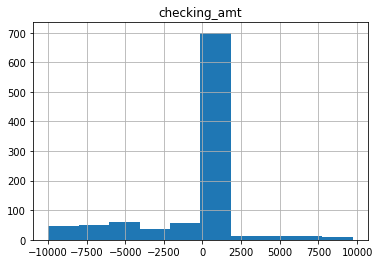

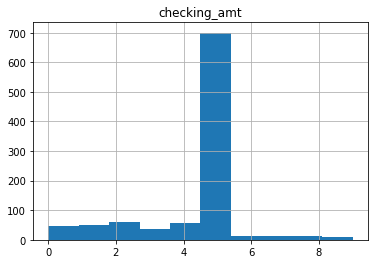

In [14]:
from feature_engine.discretisers import EqualWidthDiscretiser, EqualFrequencyDiscretiser
import matplotlib.pyplot as plt
df['checking_amt'] = df['checking_amt'].apply(float) # Stored as strings originally
df.hist(column='checking_amt') # Display raw values


# Binning is the way to go? Right now I have equal width.
# Equal frequency maybe? But I don't think so with the distribution
eqdist_discretiser = EqualWidthDiscretiser(
    bins=10, 
    variables=['checking_amt']
)
df = eqdist_discretiser.fit_transform(df)

df.hist(column='checking_amt')


In [24]:
import numpy as np

# np.mean(df[df['duration'] == '?']['checking_amt'])
# np.std(df[df['duration'] == '?']['checking_amt'])

df[df['duration'] == '?'].shape



(89, 26)

In [20]:
df[df['own_telephone'] == 'yes']
# df['own_telephone'].value_counts()

,location,state,checking_amt,duration,credit_history,purpose,credit_amount,savings,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,verified,application_date,works_outside_US
0,"Lehigh, PA",Pennsylvania,3,6,'critical/other existing credit',radio/tv,?,0,>=7,?,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,NO,BAD,?,May-07-1994,NO
5,"Westmoreland, PA",Pennsylvania,5,36,'existing paid',education,9055,0,1<=X<4,?,'male single',none,4,'no known property',35,none,'for free',1,'unskilled resident',2,yes,YES,BAD,?,5/12/1994,YES
7,"Allegheny, PA",Pennsylvania,5,36,?,'used car',6948,20.69,1<=X<4,2,'male single',none,2,car,35,none,?,1,'high qualif/self emp/mgmt',?,yes,YES,BAD,?,5/14/1994,YES
12,"Anderson, SC",South Carolina,5,12,'existing paid',radio/tv,1567,89.2,?,1,'female div/dep/mar',none,1,car,22,none,own,1,skilled,1,yes,YES,BAD,?,5/19/1994,YES
18,"Dillon, SC",South Carolina,5,24,'existing paid','used car',?,2.66,>=7,4,'female div/dep/mar',none,2,'no known property',?,none,'for free',?,'high qualif/self emp/mgmt',?,yes,YES,BAD,?,5/25/1994,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,"McKinley, NM",New Mexico,2,24,'existing paid','used car',6579,21.65,unemployed,4,'male single',?,?,'no known property',29,none,'for free',1,'high qualif/self emp/mgmt',1,yes,NO,GOOD,?,1/23/1997,NO
997,"Monroe, NY",New York,0,36,'existing paid',furniture/equipment,3959,25.06,unemployed,?,?,none,3,'life insurance',30,none,own,1,'high qualif/self emp/mgmt',?,yes,NO,BAD,?,1/28/1997,NO
998,"Monroe, NY",New York,5,12,'existing paid','new car',2390,0,>=7,4,'male single',none,3,car,50,none,own,1,skilled,1,yes,NO,GOOD,?,1/29/1997,NO
1000,"New York, NY",New York,3,30,'existing paid',?,3857,88.42,1<=X<4,4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,YES,GOOD,?,1/31/1997,YES


In [16]:
df['own_telephone'].value_counts()

none    526
yes     357
?       117
Name: own_telephone, dtype: int64

In [30]:
df['works_outside_US'].replace(['^(1|[Yy]).*', '^(0|[Nn]).*'], ['YES', 'NO'], inplace=True, regex=True)
df['class'].replace(['^([Gg]).*', '^([Bb]).*'], ['good', 'bad'], inplace=True, regex=True)

df['works_outside_US'].value_counts()

YES    537
NO     463
Name: works_outside_US, dtype: int64

,location,state,checking_amt,duration,credit_history,purpose,credit_amount,savings,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,verified,application_date,works_outside_US


In [2]:
# Replace the ?s with other
df['property_magnitude'] = df['property_magnitude'].mask(df['property_magnitude'] == "?", "other")
# Remove the single quotes around the data
df['property_magnitude'].replace("'(.*?)'", "\\1", inplace=True, regex=True)
# Display the values as a sanity check
df['property_magnitude'].value_counts()

car                  297
real estate          262
life insurance       211
no known property    137
other                 93
Name: property_magnitude, dtype: int64

In [50]:
# Grab the age column without ?s
no_miss_age = df[df['age'] != "?"]
# Convert to integer
no_miss_age = no_miss_age.astype({"age": int})
# Remove outliers and then calculate the average value
no_miss_age = no_miss_age[no_miss_age['age'] < 100]
no_miss_age = no_miss_age[no_miss_age['age'] > 0]
mean = int(no_miss_age['age'].mean())

# Remove all ?s with the calculate average, also remove the outliers again
df['age'] = df['age'].mask(df['age'] == "?", f"{mean}")
df = df.astype({"age": int})
df = df[df['age'] < 100]
df = df[df['age'] > 0]
df['age'].value_counts()

35    142
23     46
26     43
24     41
27     41
25     39
28     39
30     36
29     35
36     34
31     34
33     31
32     31
34     30
40     25
37     25
38     23
22     19
39     18
42     18
47     16
41     15
43     15
44     14
20     14
45     13
46     13
21     13
49     12
48     11
50     10
57      9
54      8
61      7
63      7
51      7
60      6
52      6
55      6
64      5
65      5
58      5
53      4
56      3
66      3
67      3
68      3
75      2
74      2
59      2
62      2
19      2
70      1
Name: age, dtype: int64

In [ ]:
# Replacing missing employment values with unknown
df['employment'] = df['employment'].mask(df['employment'] == "?", "unknown")

In [ ]:
# Replacing missing personal_status values with unknown
df['personal_status'] = df['personal_status'].mask(df['personal_status'] == "?", "unknown")
# Remove the single quotes around the data
df['personal_status'].replace("'(.*?)'", "\\1", inplace=True, regex=True)

In [ ]:
# Replacing missing other_parties values with unknown
df['other_parties'] = df['other_parties'].mask(df['other_parties'] == "?", "unknown")
# Remove the single quotes around the data
df['other_parties'].replace("'(.*?)'", "\\1", inplace=True, regex=True)

In [53]:
# Clean up the date to follow standard datetime format
df['application_date']= pd.to_datetime(df['application_date']) 

0       May-07-1994
1       May-08-1994
2          5/9/1994
3         5/10/1994
4         5/11/1994
           ...     
999       1/30/1997
1000      1/31/1997
1001    Feb-01-1997
1002    Feb-02-1997
1003    Feb-03-1997
Name: application_date, Length: 1000, dtype: object

In [59]:
# Grab the credit_amount column without ?s
no_miss_credit = df[df['credit_amount'] != "?"]
# Convert to integer
no_miss_credit = no_miss_credit.astype({"credit_amount": float})
# Remove outliers and then calculate the average value
mean = float(no_miss_credit['credit_amount'].mean())

# Remove all ?s with the calculate average, also remove the outliers again
df['credit_amount'] = df['credit_amount'].mask(df['credit_amount'] == "?", f"{mean}")
df = df.astype({"credit_amount": float})

,location,state,checking_amt,duration,credit_history,purpose,credit_amount,savings,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,verified,application_date,works_outside_US
0,"Lehigh, PA",Pennsylvania,-2589.19,6,'critical/other existing credit',radio/tv,3234.553431,0,>=7,?,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,NO,BAD,?,May-07-1994,NO
1,"Mifflin, PA",Pennsylvania,53.51,48,'existing paid',radio/tv,5951.000000,2.52,1<=X<4,2,'female div/dep/mar',none,2,?,22,none,own,1,skilled,1,none,NO,BAD,?,May-08-1994,NO
2,"Northampton, PA",Pennsylvania,0.00,12,'critical/other existing credit',education,2096.000000,0,4<=X<7,2,'male single',?,?,'real estate',49,none,?,1,'unskilled resident',2,none,NO,BAD,?,5/9/1994,NO
3,"Northampton, PA",Pennsylvania,-4695.81,42,'existing paid',furniture/equipment,7882.000000,92.15,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,?,NO,BAD,?,5/10/1994,NO
4,"Westmoreland, PA",Pennsylvania,-9540.20,24,'delayed previously',?,4870.000000,39.81,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,NO,GOOD,?,5/11/1994,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,"Nassau, NY",New York,0.00,12,'existing paid',furniture/equipment,1736.000000,0,4<=X<7,3,?,none,4,'real estate',31,none,own,1,'unskilled resident',1,none,NO,BAD,?,1/30/1997,NO
1000,"New York, NY",New York,-3296.07,30,'existing paid',?,3857.000000,88.42,1<=X<4,4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,YES,GOOD,?,1/31/1997,YES
1001,"Butler, OH",Ohio,0.00,?,'existing paid',radio/tv,804.000000,0,>=7,4,'male single',?,4,car,38,none,own,1,skilled,1,none,NO,GOOD,?,Feb-01-1997,NO
1002,"Clark, OH",Ohio,-7050.13,45,'existing paid',radio/tv,1845.000000,66.53,1<=X<4,4,'male single',?,?,'no known property',23,none,'for free',1,skilled,?,yes,YES,GOOD,?,Feb-02-1997,YES


In [ ]:
# Replacing missing other_parties values with unknown
df['purpose'] = df['other_parties'].mask(df['purpose'] == "?", "unknown")
# Remove the single quotes around the data
df['purpose'].replace("'(.*?)'", "\\1", inplace=True, regex=True)